In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("C:/Users/Shivalik Ghosh/Desktop/Competition/TRAIN.csv")
df.head()

,Index,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
0,0,01/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,254
1,1,01/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,204
2,2,01/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,173
3,3,01/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,107
4,4,01/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,78


In [3]:
df_num = df.select_dtypes(include = np.number)
df_num.columns

Index(['Index', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'Rented Bike Count'],
      dtype='object')

In [4]:
df_cat = df.select_dtypes(include = 'object')
df_cat.columns

Index(['Date', 'Seasons', 'Holiday', 'Functioning Day'], dtype='object')

In [5]:
df.drop(['Index','Date'], axis = 1, inplace= True)

In [6]:
df.isnull().sum()

Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Rented Bike Count            0
dtype: int64

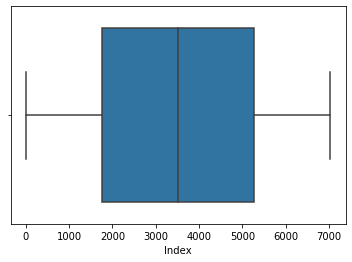

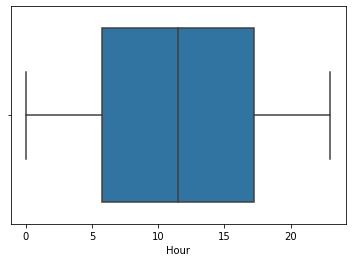

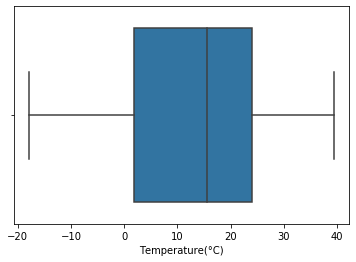

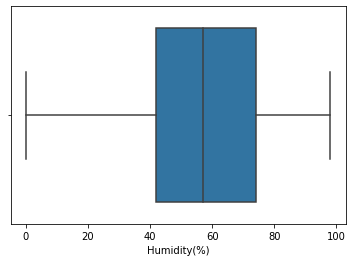

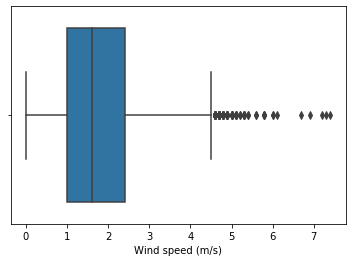

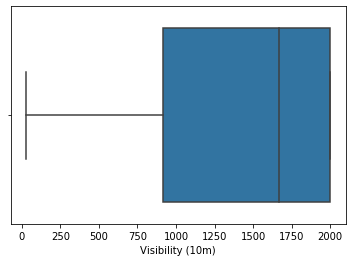

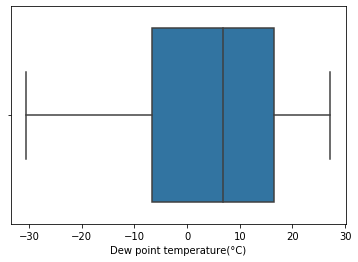

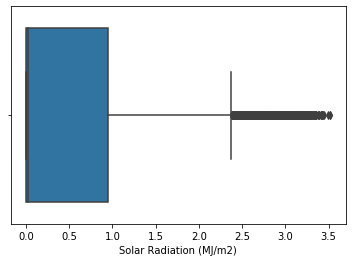

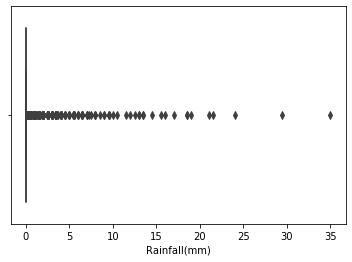

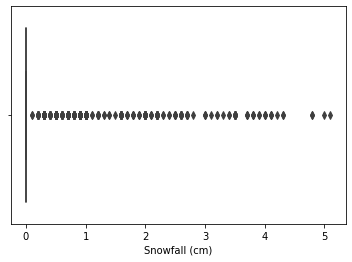

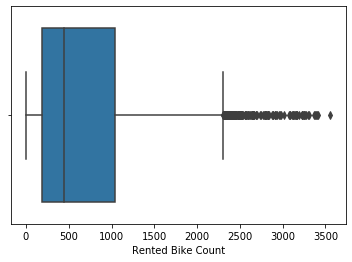

In [7]:
for i in df_num.columns :
    sns.boxplot(df_num[i])
    plt.show()

In [8]:
Outliers = ['Wind speed (m/s)', 'Solar Radiation (MJ/m2)']

In [9]:
for i in Outliers :
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    
    IQR = Q3 - Q1 
    
    LL = Q1 - (1.5*IQR)
    UL = Q3 + (1.5*IQR)
    
    df.drop(df[(df[i] > UL) | (df[i] < LL)].index, inplace = True)

In [10]:
df.shape

(6364, 13)

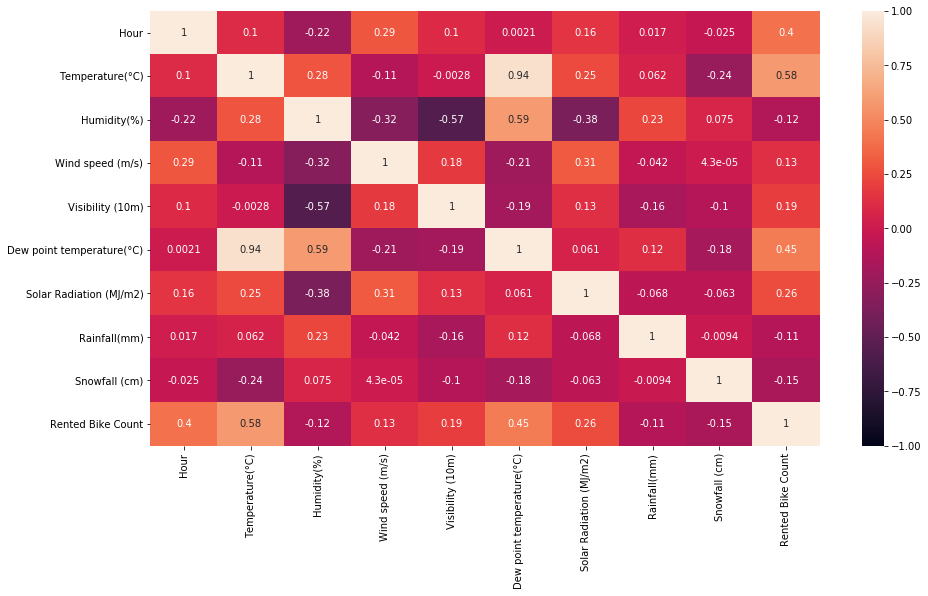

In [11]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot = True, vmin = -1)
plt.show()

In [12]:
df['Hour'] = pd.to_datetime(df['Hour'], format = '%H').dt.hour

In [13]:
df['Seasons'] = df['Seasons'].map({'Summer' : 0, 'Spring' : 1, 'Winter' : 2, 'Autumn' : 3})

In [14]:
df

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,2,No Holiday,Yes,254
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,2,No Holiday,Yes,204
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,2,No Holiday,Yes,173
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,2,No Holiday,Yes,107
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,2,No Holiday,Yes,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,19,23.5,58,0.4,1836,14.7,0.0,0.0,0.0,3,No Holiday,No,0
7028,20,22.6,67,0.3,1737,16.1,0.0,0.0,0.0,3,No Holiday,No,0
7029,21,21.7,63,1.8,1078,14.3,0.0,0.1,0.0,3,No Holiday,No,0
7030,22,20.9,71,1.6,1057,15.4,0.0,0.1,0.0,3,No Holiday,No,0


In [15]:
X = df.drop('Rented Bike Count', axis = 1)

In [16]:
X = pd.get_dummies(X, columns = ['Holiday', 'Functioning Day'], drop_first= True)

In [18]:
y = df['Rented Bike Count']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state= 42)

In [74]:
X_train.shape

(4454, 12)

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
rfr = RandomForestRegressor()

In [64]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [65]:
y_pred = rfr.predict(X_test)
y_pred

array([2023.06,  291.29,  331.57, ..., 1091.99,  330.04,  435.03])

In [66]:
from sklearn.metrics import r2_score, mean_squared_error

In [67]:
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_test

233.24582544863404

In [68]:
r2_score1 = r2_score(y_test, y_pred)

In [69]:
r2_score1

0.8754929033047647

In [32]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
dtr = DecisionTreeRegressor()

In [34]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [38]:
y_pred2 = dtr.predict(X_test)

In [39]:
rmse_test1 = np.sqrt(mean_squared_error(y_test, y_pred2))
rmse_test1

307.11807678644584

In [40]:
from xgboost import XGBRegressor

In [41]:
XGB = XGBRegressor()

In [42]:
XGB.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
y_pred3 = XGB.predict(X_test)

In [44]:
y_pred3

array([2053.0974 ,  152.40292,  339.65466, ..., 1000.96063,  325.12894,
        495.97263], dtype=float32)

In [45]:
rmse_test3 = np.sqrt(mean_squared_error(y_test, y_pred3))
rmse_test3

237.69607299083702

In [46]:
r2_score2 = r2_score(y_test, y_pred3)

In [47]:
r2_score2

0.8706964762267805

In [48]:
from sklearn.model_selection import RandomizedSearchCV

In [49]:
from scipy.stats import randint as sp_randint 

In [50]:
params = {'n_estimators' : sp_randint(50,400),
         'max_features' : sp_randint(2,16),
         'max_depth' : sp_randint(2,10)}

In [55]:
rsearch = RandomizedSearchCV(rfr, param_distributions = params,
                            scoring = 'roc_auc', cv = 3, 
                            return_train_score = True, n_iter = 50, 
                            n_jobs = -1, random_state = 4)

In [56]:
rsearch.fit(X_train, y_train)

C:\Users\Shivalik Ghosh\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  category=UserWarning
C:\Users\Shivalik Ghosh\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the train scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  category=UserWarning


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000213FC1D4308>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000213FACD52C8>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000213FAFF63C8>},
                   random_state=4, return_train_score=True, scoring='roc_auc')

In [57]:
rsearch.best_params_

{'max_depth': 4, 'max_features': 9, 'n_estimators': 247}

In [70]:
from sklearn.model_selection import KFold, GridSearchCV

In [72]:
from sklearn.feature_selection import RFE

In [73]:
folds = KFold(n_splits = 3, shuffle = True, random_state = 42)

In [75]:
params = [{'n_features_to_select' : list(range(1,13))}]

In [77]:
rfe = RFE(rfr)

In [78]:
gsearch = GridSearchCV(rfe, param_grid = params , scoring = 'r2', return_train_score = True, cv = folds)

In [79]:
gsearch.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=RFE(estimator=RandomForestRegressor()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12]}],
             return_train_score=True, scoring='r2')

In [82]:
cv_result = pd.DataFrame(gsearch.cv_results_)

In [83]:
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,8.737604,0.157259,0.026864,0.001620,1,{'n_features_to_select': 1},0.290168,0.232104,0.291904,0.271392,0.027790,12,0.455663,0.475706,0.445031,0.458800,0.012718
1,9.000293,0.222379,0.031079,0.002288,2,{'n_features_to_select': 2},0.581215,0.581361,0.600091,0.587555,0.008864,11,0.905438,0.903818,0.898698,0.902651,0.002873
2,8.088419,0.109352,0.030314,0.001316,3,{'n_features_to_select': 3},0.779997,0.797684,0.792780,0.790154,0.007456,10,0.971149,0.968329,0.967848,0.969109,0.001456
3,7.919818,0.087230,0.031182,0.001254,4,{'n_features_to_select': 4},0.798187,0.815318,0.819772,0.811093,0.009305,9,0.973605,0.971603,0.971435,0.972214,0.000986
4,7.059714,0.286604,0.030405,0.000686,5,{'n_features_to_select': 5},0.800867,0.826048,0.825938,0.817618,0.011845,8,0.973417,0.973791,0.973943,0.973717,0.000221
5,6.293048,0.059181,0.030897,0.001409,6,{'n_features_to_select': 6},0.835302,0.827315,0.824140,0.828919,0.004696,7,0.978234,0.975585,0.974225,0.976015,0.001664
6,5.706284,0.130859,0.034084,0.001880,7,{'n_features_to_select': 7},0.837467,0.863499,0.854544,0.851837,0.010799,6,0.979141,0.979599,0.979298,0.979346,0.000190
7,4.773837,0.015241,0.033306,0.004006,8,{'n_features_to_select': 8},0.840264,0.866945,0.858706,0.855305,0.011155,5,0.979146,0.979909,0.978887,0.979314,0.000434
8,3.938732,0.014969,0.032600,0.001026,9,{'n_features_to_select': 9},0.850449,0.866912,0.863559,0.860307,0.007104,4,0.980259,0.979635,0.978944,0.979613,0.000537
9,2.970375,0.009773,0.030737,0.000226,10,{'n_features_to_select': 10},0.853516,0.865781,0.865871,0.861723,0.005803,2,0.980876,0.980873,0.979297,0.980349,0.000744


In [102]:
rfe = RFE(rfr, n_features_to_select = 12)

In [103]:
rfe.fit(X_train,y_train)

RFE(estimator=RandomForestRegressor(), n_features_to_select=12)

In [104]:
y_pred4 = rfe.predict(X_test)

In [105]:
rmse_test4 = np.sqrt(mean_squared_error(y_test, y_pred4))
rmse_test4

233.63891178561522

In [106]:
r2_score2 = r2_score(y_test, y_pred4)

In [107]:
r2_score2

0.8750728891057248

In [108]:
Test = pd.read_csv("C:/Users/Shivalik Ghosh/Desktop/Competition/TESTDocship.csv")

In [110]:
Test.head(1)

,Index,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,20/09/2018,0,20.1,58,0.3,2000,11.5,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [116]:
Test.drop('Date', axis = 1, inplace = True)

In [117]:
df_submission = pd.DataFrame()

In [118]:
df_submission['Index'] = Test['Index']

In [ ]:
df_submission['Rented Bike COunt'] = y_pred
df_submission.to_csv('prediction_1.csv', index = False)
df_submission.head()

In [115]:
Test.shape

(1728, 14)